# Lending Club Loan Data Project - Kishor Kumar

LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. LendingClub enables borrowers to create unsecured personal loans between 1000 and 40,000 US dollars. The standard loan period is three years. Investors can search and browse the loan listings on LendingClub website and select loans that they want to invest in based on the information supplied about the borrower, amount of loan, loan grade, and loan purpose. Investors make money from interest. LendingClub makes money by charging borrowers an origination fee and investors a service fee. (Wikepedia)

## Data

Lending Club provides historical loan performance data to investors for more comprehensive analysis. In summary, our dataset contains total of 887379 records with 74 features in a comma separated file. Each record in the file represent a loan request. The Data was downloaded from the kaggle website.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [204]:
df_original = pd.read_csv("LC_loan_data.csv")

In [294]:
df = df_original.copy(deep=True)

In [295]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
pd.set_option('max_columns', None)

In [297]:
df.shape

(887379, 74)

In [298]:
df["earliest_cr_line"].dtypes

dtype('O')

## Data Description

In [299]:
df_description = pd.read_excel('LCDataDictionary.xlsx').dropna()
df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


# Defaulted Loans

The target variable for this modeling is the loan_status columns in which the target value is assigned the value of 1 if the loan status is defaulted or 0 if the status is other.

The main goal is to predict the risk of loan being defaulted provided all the features to the model.

In [300]:
target_list = [1 if i=='Default' else 0 for i in df['loan_status']]

df['TARGET'] = target_list
df['TARGET'].value_counts()

0    886160
1      1219
Name: TARGET, dtype: int64

In [327]:
df= df.drop("loan_status", axis=1)

In [301]:
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

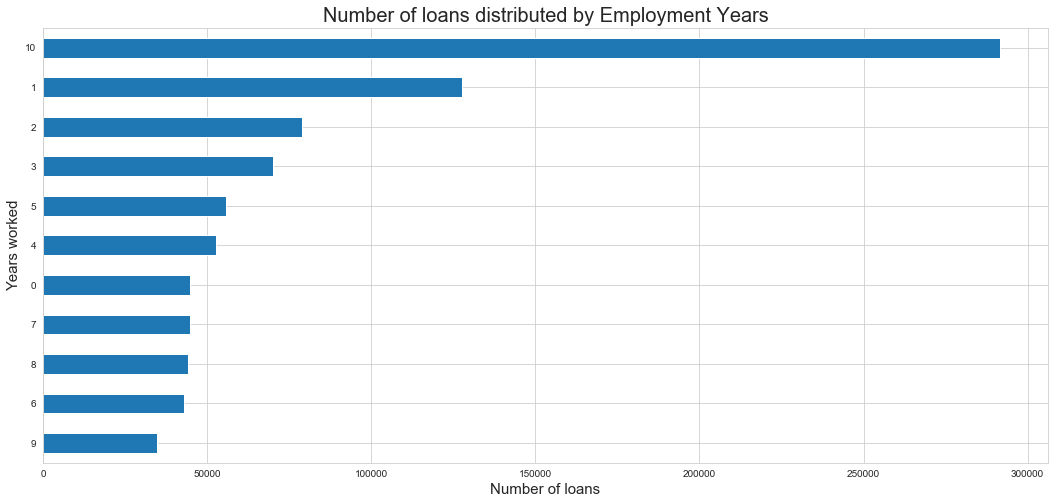

In [302]:
df['emp_length'].fillna(value=0,inplace=True)

df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)

df['emp_length'].value_counts().sort_values().plot(kind='barh',figsize=(18,8))
plt.title('Number of loans distributed by Employment Years',fontsize=20)
plt.xlabel('Number of loans',fontsize=15)
plt.ylabel('Years worked',fontsize=15);

It is intersting from the above plot that there are two extremes in the number of loans taken based on the years worked by the borrower. The maximum number of loans are borrowed by the people who has an woroking experience of 10 years followed by the people who has the minimum working experience of 1 year.

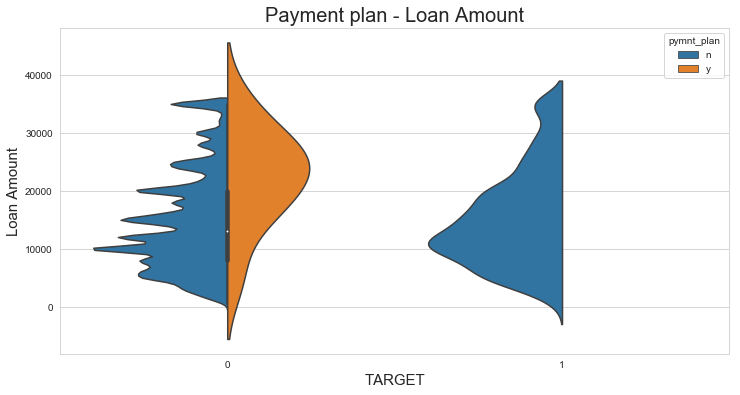

In [303]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="pymnt_plan", split=True)
plt.title("Payment plan - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

# Handling Missing Values

In [304]:
df.isna().mean().sort_values()

id                             0.000000
addr_state                     0.000000
dti                            0.000000
revol_bal                      0.000000
initial_list_status            0.000000
out_prncp                      0.000000
total_pymnt                    0.000000
total_pymnt_inv                0.000000
total_rec_prncp                0.000000
total_rec_int                  0.000000
total_rec_late_fee             0.000000
recoveries                     0.000000
collection_recovery_fee        0.000000
last_pymnt_amnt                0.000000
policy_code                    0.000000
application_type               0.000000
zip_code                       0.000000
purpose                        0.000000
out_prncp_inv                  0.000000
funded_amnt                    0.000000
member_id                      0.000000
loan_amnt                      0.000000
url                            0.000000
funded_amnt_inv                0.000000
term                           0.000000


The features which has more than 70% of missing values has been dropped from the dataframe as it does not help us in our modeling.

In [305]:
df = df.drop(df.loc[:,df.isna().mean().sort_values()>0.7].columns,axis=1)

In [306]:
df = df.dropna(axis=0)

In [307]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,TARGET
42537,10159498,1319523,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,A2,MANAGER INFORMATION DELIVERY,10,MORTGAGE,105000.0,Not Verified,Dec-2013,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,UNIVERSAL CARD,060xx,CT,14.05,0.0,Mar-1994,1.0,43.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-2016,368.45,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,0
42539,10159548,12011167,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,A5,aircraft maintenance engineer,2,MORTGAGE,63000.0,Not Verified,Dec-2013,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Pay off,334xx,FL,16.51,0.0,Mar-1998,0.0,34.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-2016,476.30,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,0
42541,10129477,11981093,14000.0,14000.0,14000.0,36 months,12.85,470.71,B,B4,Assistant Director - Human Resources,4,RENT,88000.0,Not Verified,Dec-2013,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Debt consolidation,282xx,NC,10.02,1.0,Jun-1988,0.0,16.0,6.0,1.0,3686.0,81.9,14.0,f,5274.10,5274.10,11296.94,11296.94,8725.90,2571.04,0.0,0.0,0.0,Jan-2016,470.71,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,17672.0,4500.0,0
42543,10159611,12011228,10000.0,10000.0,10000.0,36 months,9.67,321.13,B,B1,Registered Nurse,7,MORTGAGE,102000.0,Not Verified,Dec-2013,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Clean Up,027xx,MA,15.55,2.0,Oct-1989,0.0,11.0,9.0,0.0,9912.0,44.4,22.0,f,3659.12,3659.12,7706.81,7706.81,6340.88,1365.93,0.0,0.0,0.0,Jan-2016,321.13,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,39143.0,22300.0,0
42547,10149526,12001069,27600.0,27600.0,27600.0,60 months,19.97,730.78,D,D5,Street Operations Supervisor,6,MORTGAGE,73000.0,Source Verified,Dec-2013,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,Consolidation of debt and home improve.,802xx,CO,23.13,1.0,Jun-1989,1.0,7.0,10.0,0.0,27003.0,82.8,24.0,f,19671.64,19671.64,17538.17,17538.17,7928.36,9609.81,0.0,0.0,0.0,Jan-2016,730.78,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,241609.0,32600.0,0
42548,10224583,12086734,11100.0,11100.0,11100.0,36 months,14.98,384.68,C,C3,Teacher,10,MORTGAGE,90000.0,Not Verified,Dec-2013,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Other,103xx,NY,3.73,1.0,Jun-2001,0.0,16.0,9.0,0.0,6619.0,66.2,12.0,f,4262.60,4262.60,9231.84,9231.84,6837.40,2394.44,0.0,0.0,0.0,Jan-2016,384.68,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,353402.0,10000.0,0
42558,10109602,11961187,4500.0,4500.0,4500.0,36 months,19.22,165.46,D,D4,Senior Network Engineer,10,RENT,105000.0,Not Verified,Dec-2013,Current,n,https://www.lendingclub.com/browse/loanDetail....,other,Bill Consolidation and tires for truck,750xx,TX,16.23,1.0,Mar-1990,0.0,10.0,5.0,0.0,19090.0,93.1,10.0,f,1793.21,1793.21,3970.85,3970.85,2706.79,1264.06,0.0,0.0,0.0,Jan-2016,165.46,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,40100.0,20500.0,0
42564,10099585,11951188,18450.0,18450.0,18450.0,36 months,13.98,630.40,C,C1,LPN nurse,10,RENT,65000.0,Not Verified,Dec-2013,Current,n,https://www.lendingclub.com/browse/loanDetail....,debt_consolidation,debt free,334xx,FL,15.

In [308]:
df.isna().sum().sum()

0

### Checking for any correlation between our Target variable and other features

In [309]:
corr = df.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', corr.tail(10))
print('\nMost Negative Correlations:\n', corr.head(10))

Most Positive Correlations:
 total_pymnt_inv            0.005822
dti                        0.008750
inq_last_6mths             0.011178
total_rec_int              0.014835
total_rec_late_fee         0.021774
int_rate                   0.031689
TARGET                     1.000000
recoveries                      NaN
collection_recovery_fee         NaN
policy_code                     NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 id                           -0.031490
member_id                    -0.031431
tot_cur_bal                  -0.008327
annual_inc                   -0.007037
total_rev_hi_lim             -0.005956
revol_bal                    -0.005676
tot_coll_amt                 -0.002469
acc_now_delinq               -0.001538
collections_12_mths_ex_med   -0.000311
total_rec_prncp              -0.000098
Name: TARGET, dtype: float64


### From the above output, it is clear that Interest Rate has the highest positive correlation with the loan getting defaulted

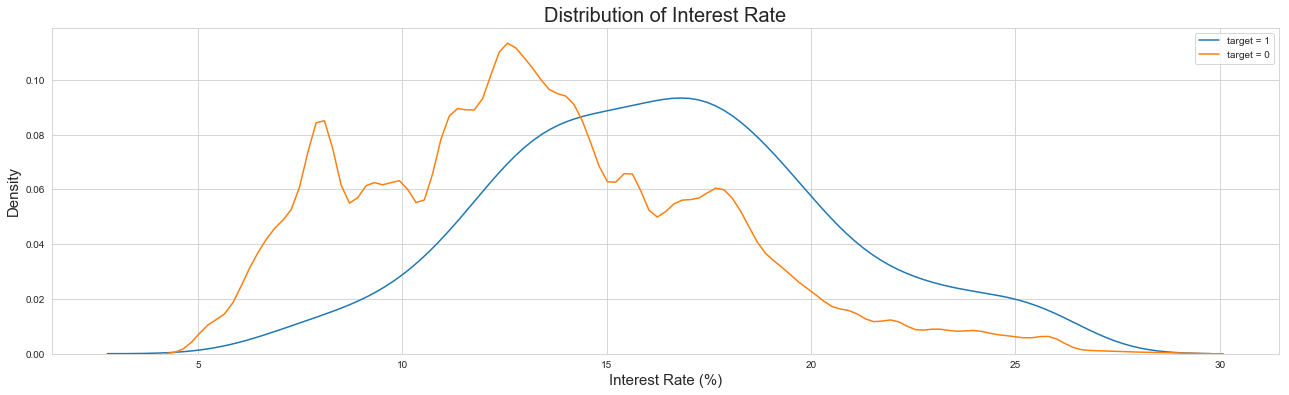

In [310]:
fig = plt.figure(figsize=(22,6))
sns.kdeplot(df.loc[df['TARGET'] == 1, 'int_rate'], label = 'target = 1')
sns.kdeplot(df.loc[df['TARGET'] == 0, 'int_rate'], label = 'target = 0');
plt.xlabel('Interest Rate (%)',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.title('Distribution of Interest Rate',fontsize=20);

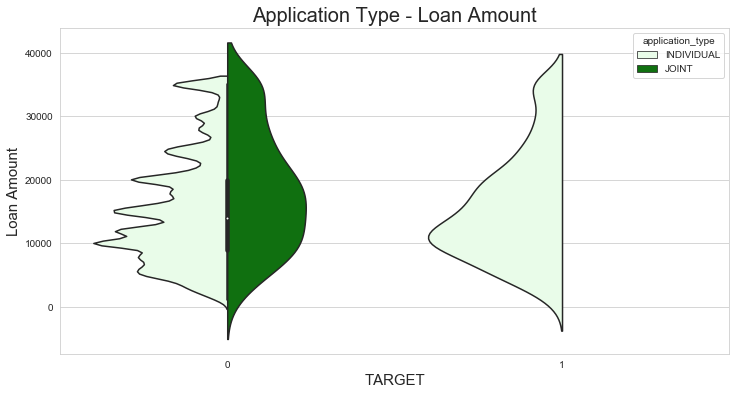

In [268]:
fig = plt.figure(figsize=(12,6))
sns.violinplot(x="TARGET",y="loan_amnt",data=df, hue="application_type", split=True,color='green')
plt.title("Application Type - Loan Amount", fontsize=20)
plt.xlabel("TARGET", fontsize=15)
plt.ylabel("Loan Amount", fontsize=15);

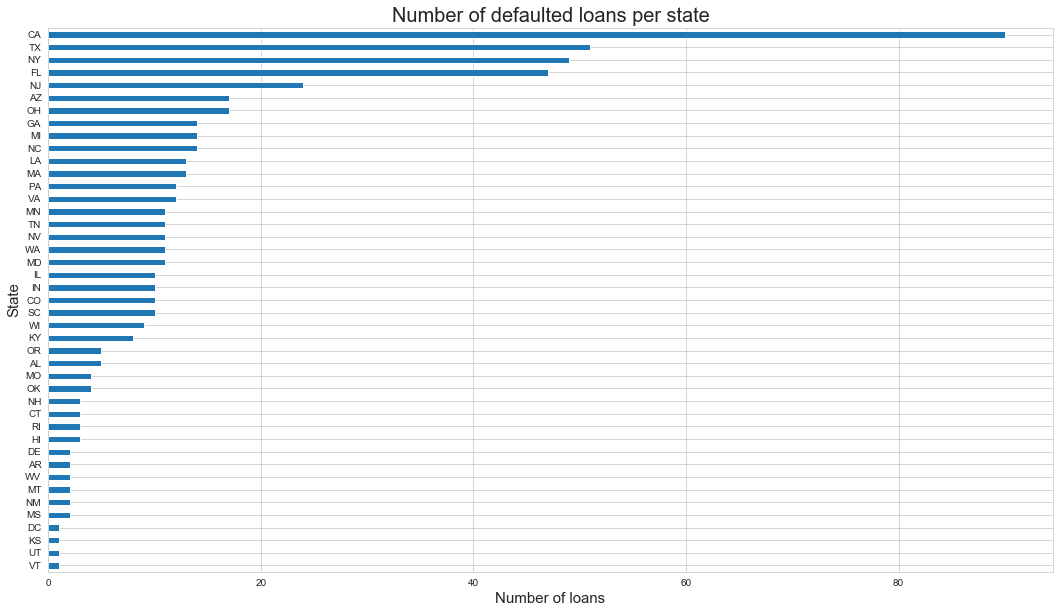

In [311]:
fig = plt.figure(figsize=(18,10))
df[df['TARGET']==1].groupby('addr_state')['TARGET'].count().sort_values().plot(kind='barh')
plt.ylabel('State',fontsize=15)
plt.xlabel('Number of loans',fontsize=15)
plt.title('Number of defaulted loans per state',fontsize=20);

The Categorical vaiables which has the huge number of cardinality has been dropped from our dataframe

In [312]:
unneeded_columns = ["id","member_id","sub_grade","emp_title","url","title","zip_code"]

In [313]:
{column:list(df[column].unique()) for column in df.drop(unneeded_columns,axis=1).columns 
 if df.dtypes[column]=="object"}

{'term': [' 36 months', ' 60 months'],
 'grade': ['A', 'B', 'D', 'C', 'E', 'F', 'G'],
 'emp_length': ['10', '2', '4', '7', '6', '8', '5', '3', '1', '9', 0],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'NONE', 'OTHER', 'ANY'],
 'verification_status': ['Not Verified', 'Source Verified', 'Verified'],
 'issue_d': ['Dec-2013',
  'Nov-2013',
  'Oct-2013',
  'Sep-2013',
  'Aug-2013',
  'Jul-2013',
  'Jun-2013',
  'May-2013',
  'Apr-2013',
  'Mar-2013',
  'Feb-2013',
  'Jan-2013',
  'Dec-2012',
  'Nov-2012',
  'Oct-2012',
  'Sep-2012',
  'Aug-2012',
  'Dec-2014',
  'Nov-2014',
  'Oct-2014',
  'Sep-2014',
  'Aug-2014',
  'Jul-2014',
  'Jun-2014',
  'May-2014',
  'Apr-2014',
  'Mar-2014',
  'Feb-2014',
  'Jan-2014',
  'Dec-2015',
  'Nov-2015',
  'Oct-2015',
  'Sep-2015',
  'Aug-2015',
  'Jul-2015',
  'Jun-2015',
  'May-2015',
  'Apr-2015',
  'Mar-2015',
  'Feb-2015',
  'Jan-2015'],
 'loan_status': ['Current',
  'Late (31-120 days)',
  'In Grace Period',
  'Late (16-30 days)',
  'Default',
  '

In [314]:
df = df.drop(unneeded_columns,axis=1)

In [315]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,TARGET
42537,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,10,MORTGAGE,105000.0,Not Verified,Dec-2013,Current,n,debt_consolidation,CT,14.05,0.0,Mar-1994,1.0,43.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-2016,368.45,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,0
42539,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,2,MORTGAGE,63000.0,Not Verified,Dec-2013,Current,n,debt_consolidation,FL,16.51,0.0,Mar-1998,0.0,34.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-2016,476.30,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,0
42541,14000.0,14000.0,14000.0,36 months,12.85,470.71,B,4,RENT,88000.0,Not Verified,Dec-2013,Current,n,debt_consolidation,NC,10.02,1.0,Jun-1988,0.0,16.0,6.0,1.0,3686.0,81.9,14.0,f,5274.10,5274.10,11296.94,11296.94,8725.90,2571.04,0.0,0.0,0.0,Jan-2016,470.71,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,17672.0,4500.0,0
42543,10000.0,10000.0,10000.0,36 months,9.67,321.13,B,7,MORTGAGE,102000.0,Not Verified,Dec-2013,Current,n,debt_consolidation,MA,15.55,2.0,Oct-1989,0.0,11.0,9.0,0.0,9912.0,44.4,22.0,f,3659.12,3659.12,7706.81,7706.81,6340.88,1365.93,0.0,0.0,0.0,Jan-2016,321.13,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,39143.0,22300.0,0
42547,27600.0,27600.0,27600.0,60 months,19.97,730.78,D,6,MORTGAGE,73000.0,Source Verified,Dec-2013,Current,n,debt_consolidation,CO,23.13,1.0,Jun-1989,1.0,7.0,10.0,0.0,27003.0,82.8,24.0,f,19671.64,19671.64,17538.17,17538.17,7928.36,9609.81,0.0,0.0,0.0,Jan-2016,730.78,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,241609.0,32600.0,0
42548,11100.0,11100.0,11100.0,36 months,14.98,384.68,C,10,MORTGAGE,90000.0,Not Verified,Dec-2013,Current,n,other,NY,3.73,1.0,Jun-2001,0.0,16.0,9.0,0.0,6619.0,66.2,12.0,f,4262.60,4262.60,9231.84,9231.84,6837.40,2394.44,0.0,0.0,0.0,Jan-2016,384.68,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,353402.0,10000.0,0
42558,4500.0,4500.0,4500.0,36 months,19.22,165.46,D,10,RENT,105000.0,Not Verified,Dec-2013,Current,n,other,TX,16.23,1.0,Mar-1990,0.0,10.0,5.0,0.0,19090.0,93.1,10.0,f,1793.21,1793.21,3970.85,3970.85,2706.79,1264.06,0.0,0.0,0.0,Jan-2016,165.46,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,40100.0,20500.0,0
42564,18450.0,18450.0,18450.0,36 months,13.98,630.40,C,10,RENT,65000.0,Not Verified,Dec-2013,Current,n,debt_consolidation,FL,15.84,0.0,Aug-1994,0.0,35.0,14.0,0.0,20803.0,49.1,32.0,f,7022.04,7022.04,15129.10,15129.10,11427.96,3701.14,0.0,0.0,0.0,Jan-2016,630.40,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,23136.0,42400.0,0
42566,5000.0,5000.0,5000.0,36 months,13.53,169.75,B,10,OWN,70000.0,Not Verified,Dec-2013,Current,n,other,TX,22.56,0.0,Dec-1993,1.0,45.0,12.0,0.0,9775.0,39.6,35.0,w,1895.21,1895.21,4074.00,4074.00,3104.79,969.21,0.0,0.0,0.0,Jan-2016,169.75,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,47071.0,24700.0,0
42567,8325.0,8325.0,8325.0,36 months,15.61,291.09,C,10,MORTGAGE,65000.0,Source Verified,Dec-2013,Current,n,debt_consolidation,CA,5.71,1.0,Aug-2000,0.0,8.0,5.0,0.0,6363.0,90.9,18.0,f,3214.73,3214.73,6985.79,6985.79,5110.27,1875.52,0.0,0.0,0.0,Jan-2016,291.09,Feb-2016,Jan-2016,1.0,1.0,INDIVIDUAL,0.0,0.0,259494.0,7000.0,0


# Dealing with DATE variables

In [316]:
date_columns = ["issue_d","earliest_cr_line","next_pymnt_d","last_pymnt_d","last_credit_pull_d"]

In [317]:
for column in date_columns:
    df[column + '_month'] = df[column].apply(lambda x: x[0:3])
    df[column + '_year'] = df[column].apply(lambda x: x[-4:])

In [318]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,TARGET,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,next_pymnt_d_month,next_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
42537,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,10,MORTGAGE,105000.0,Not Verified,Dec-2013,Current,n,debt_consolidation,CT,14.05,0.0,Mar-1994,1.0,43.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,Jan-2016,368.45,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,0,Dec,2013,Mar,1994,Feb,2016,Jan,2016,Jan,2016
42539,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,2,MORTGAGE,63000.0,Not Verified,Dec-2013,Current,n,debt_consolidation,FL,16.51,0.0,Mar-1998,0.0,34.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,Jan-2016,476.30,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,0,Dec,2013,Mar,1998,Feb,2016,Jan,2016,Jan,2016
42541,14000.0,14000.0,14000.0,36 months,12.85,470.71,B,4,RENT,88000.0,Not Verified,Dec-2013,Current,n,debt_consolidation,NC,10.02,1.0,Jun-1988,0.0,16.0,6.0,1.0,3686.0,81.9,14.0,f,5274.10,5274.10,11296.94,11296.94,8725.90,2571.04,0.0,0.0,0.0,Jan-2016,470.71,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,17672.0,4500.0,0,Dec,2013,Jun,1988,Feb,2016,Jan,2016,Jan,2016
42543,10000.0,10000.0,10000.0,36 months,9.67,321.13,B,7,MORTGAGE,102000.0,Not Verified,Dec-2013,Current,n,debt_consolidation,MA,15.55,2.0,Oct-1989,0.0,11.0,9.0,0.0,9912.0,44.4,22.0,f,3659.12,3659.12,7706.81,7706.81,6340.88,1365.93,0.0,0.0,0.0,Jan-2016,321.13,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,39143.0,22300.0,0,Dec,2013,Oct,1989,Feb,2016,Jan,2016,Jan,2016
42547,27600.0,27600.0,27600.0,60 months,19.97,730.78,D,6,MORTGAGE,73000.0,Source Verified,Dec-2013,Current,n,debt_consolidation,CO,23.13,1.0,Jun-1989,1.0,7.0,10.0,0.0,27003.0,82.8,24.0,f,19671.64,19671.64,17538.17,17538.17,7928.36,9609.81,0.0,0.0,0.0,Jan-2016,730.78,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,241609.0,32600.0,0,Dec,2013,Jun,1989,Feb,2016,Jan,2016,Jan,2016
42548,11100.0,11100.0,11100.0,36 months,14.98,384.68,C,10,MORTGAGE,90000.0,Not Verified,Dec-2013,Current,n,other,NY,3.73,1.0,Jun-2001,0.0,16.0,9.0,0.0,6619.0,66.2,12.0,f,4262.60,4262.60,9231.84,9231.84,6837.40,2394.44,0.0,0.0,0.0,Jan-2016,384.68,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,353402.0,10000.0,0,Dec,2013,Jun,2001,Feb,2016,Jan,2016,Jan,2016
42558,4500.0,4500.0,4500.0,36 months,19.22,165.46,D,10,RENT,105000.0,Not Verified,Dec-2013,Current,n,other,TX,16.23,1.0,Mar-1990,0.0,10.0,5.0,0.0,19090.0,93.1,10.0,f,1793.21,1793.21,3970.85,3970.85,2706.79,1264.06,0.0,0.0,0.0,Jan-2016,165.46,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,40100.0,20500.0,0,Dec,2013,Mar,1990,Feb,2016,Jan,2016,Jan,2016
42564,18450.0,18450.0,18450.0,36 months,13.98,630.40,C,10,RENT,65000.0,Not Verified,Dec-2013,Current,n,debt_consolidation,FL,15.84,0.0,Aug-1994,0.0,35.0,14.0,0.0,20803.0,49.1,32.0,f,7022.04,7022.04,15129.10,15129.10,11427.96,3701.14,0.0,0.0,0.0,Jan-2016,630.40,Feb-2016,Jan-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,23136.0,42400.0,0,Dec,2013,Aug,1994,Feb,2016,Jan,2016,Jan,2016
42566,5000.0,5000.0,5000.0,36 months,13.53,169.75,B,10,OWN,70000.0,Not Verified,Dec-2013,Current,n,other,TX,22.56,0.0,Dec-1993,1.0,45.0,12.0,0.0,9775.0,39.6,35.0,w,1895.21,1895.21,4074.00,4074.00,3104.79,969.21,0.0,0.0,0.0,Jan-2016,169.75,Feb-201

In [319]:
df= df.drop(date_columns,axis=1)

In [320]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,TARGET,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,next_pymnt_d_month,next_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
42537,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,10,MORTGAGE,105000.0,Not Verified,Current,n,debt_consolidation,CT,14.05,0.0,1.0,43.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,0,Dec,2013,Mar,1994,Feb,2016,Jan,2016,Jan,2016
42539,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,2,MORTGAGE,63000.0,Not Verified,Current,n,debt_consolidation,FL,16.51,0.0,0.0,34.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,0,Dec,2013,Mar,1998,Feb,2016,Jan,2016,Jan,2016
42541,14000.0,14000.0,14000.0,36 months,12.85,470.71,B,4,RENT,88000.0,Not Verified,Current,n,debt_consolidation,NC,10.02,1.0,0.0,16.0,6.0,1.0,3686.0,81.9,14.0,f,5274.10,5274.10,11296.94,11296.94,8725.90,2571.04,0.0,0.0,0.0,470.71,0.0,1.0,INDIVIDUAL,0.0,0.0,17672.0,4500.0,0,Dec,2013,Jun,1988,Feb,2016,Jan,2016,Jan,2016
42543,10000.0,10000.0,10000.0,36 months,9.67,321.13,B,7,MORTGAGE,102000.0,Not Verified,Current,n,debt_consolidation,MA,15.55,2.0,0.0,11.0,9.0,0.0,9912.0,44.4,22.0,f,3659.12,3659.12,7706.81,7706.81,6340.88,1365.93,0.0,0.0,0.0,321.13,0.0,1.0,INDIVIDUAL,0.0,0.0,39143.0,22300.0,0,Dec,2013,Oct,1989,Feb,2016,Jan,2016,Jan,2016
42547,27600.0,27600.0,27600.0,60 months,19.97,730.78,D,6,MORTGAGE,73000.0,Source Verified,Current,n,debt_consolidation,CO,23.13,1.0,1.0,7.0,10.0,0.0,27003.0,82.8,24.0,f,19671.64,19671.64,17538.17,17538.17,7928.36,9609.81,0.0,0.0,0.0,730.78,0.0,1.0,INDIVIDUAL,0.0,0.0,241609.0,32600.0,0,Dec,2013,Jun,1989,Feb,2016,Jan,2016,Jan,2016
42548,11100.0,11100.0,11100.0,36 months,14.98,384.68,C,10,MORTGAGE,90000.0,Not Verified,Current,n,other,NY,3.73,1.0,0.0,16.0,9.0,0.0,6619.0,66.2,12.0,f,4262.60,4262.60,9231.84,9231.84,6837.40,2394.44,0.0,0.0,0.0,384.68,0.0,1.0,INDIVIDUAL,0.0,0.0,353402.0,10000.0,0,Dec,2013,Jun,2001,Feb,2016,Jan,2016,Jan,2016
42558,4500.0,4500.0,4500.0,36 months,19.22,165.46,D,10,RENT,105000.0,Not Verified,Current,n,other,TX,16.23,1.0,0.0,10.0,5.0,0.0,19090.0,93.1,10.0,f,1793.21,1793.21,3970.85,3970.85,2706.79,1264.06,0.0,0.0,0.0,165.46,0.0,1.0,INDIVIDUAL,0.0,0.0,40100.0,20500.0,0,Dec,2013,Mar,1990,Feb,2016,Jan,2016,Jan,2016
42564,18450.0,18450.0,18450.0,36 months,13.98,630.40,C,10,RENT,65000.0,Not Verified,Current,n,debt_consolidation,FL,15.84,0.0,0.0,35.0,14.0,0.0,20803.0,49.1,32.0,f,7022.04,7022.04,15129.10,15129.10,11427.96,3701.14,0.0,0.0,0.0,630.40,0.0,1.0,INDIVIDUAL,0.0,0.0,23136.0,42400.0,0,Dec,2013,Aug,1994,Feb,2016,Jan,2016,Jan,2016
42566,5000.0,5000.0,5000.0,36 months,13.53,169.75,B,10,OWN,70000.0,Not Verified,Current,n,other,TX,22.56,0.0,1.0,45.0,12.0,0.0,9775.0,39.6,35.0,w,1895.21,1895.21,4074.00,4074.00,3104.79,969.21,0.0,0.0,0.0,169.75,0.0,1.0,INDIVIDUAL,0.0,0.0,47071.0,24700.0,0,Dec,2013,Dec,1993,Feb,2016,Jan,2016,Jan,2016
42567,8325.0,8325.0,8325.0,36 months,15.61,291.09,C,10,MORTGAGE,65000.0,Source Verified,Current,n,debt_consolidation,CA,5.71,1.0,0.0,8.0,5.0,0.0,6363.0,90.9,18.0,f,3214.73,3214.73,6985.79,6985.79,5110.27,1875.52,0.0,0.0,0.0,291.09,1.0,1.0,INDIVIDUAL,0.0,0.0,259494.0,7000.0,0,Dec,2013,Aug,2000,Feb,2016,Jan,2016,Jan,2016


# Encoding

In [321]:
month_ordering = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [322]:
for column in date_columns:
   df[column+ '_month'] =  df[column+ '_month'].apply(lambda x: month_ordering.index(x))

In [323]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,TARGET,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,next_pymnt_d_month,next_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year
42537,12000.0,12000.0,12000.0,36 months,6.62,368.45,A,10,MORTGAGE,105000.0,Not Verified,Current,n,debt_consolidation,CT,14.05,0.0,1.0,43.0,12.0,0.0,13168.0,21.6,22.0,w,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,0.0,1.0,INDIVIDUAL,0.0,0.0,267646.0,61100.0,0,11,2013,2,1994,1,2016,0,2016,0,2016
42539,15000.0,15000.0,15000.0,36 months,8.90,476.30,A,2,MORTGAGE,63000.0,Not Verified,Current,n,debt_consolidation,FL,16.51,0.0,0.0,34.0,8.0,0.0,11431.0,74.2,29.0,w,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,0.0,1.0,INDIVIDUAL,0.0,1514.0,272492.0,15400.0,0,11,2013,2,1998,1,2016,0,2016,0,2016
42541,14000.0,14000.0,14000.0,36 months,12.85,470.71,B,4,RENT,88000.0,Not Verified,Current,n,debt_consolidation,NC,10.02,1.0,0.0,16.0,6.0,1.0,3686.0,81.9,14.0,f,5274.10,5274.10,11296.94,11296.94,8725.90,2571.04,0.0,0.0,0.0,470.71,0.0,1.0,INDIVIDUAL,0.0,0.0,17672.0,4500.0,0,11,2013,5,1988,1,2016,0,2016,0,2016
42543,10000.0,10000.0,10000.0,36 months,9.67,321.13,B,7,MORTGAGE,102000.0,Not Verified,Current,n,debt_consolidation,MA,15.55,2.0,0.0,11.0,9.0,0.0,9912.0,44.4,22.0,f,3659.12,3659.12,7706.81,7706.81,6340.88,1365.93,0.0,0.0,0.0,321.13,0.0,1.0,INDIVIDUAL,0.0,0.0,39143.0,22300.0,0,11,2013,9,1989,1,2016,0,2016,0,2016
42547,27600.0,27600.0,27600.0,60 months,19.97,730.78,D,6,MORTGAGE,73000.0,Source Verified,Current,n,debt_consolidation,CO,23.13,1.0,1.0,7.0,10.0,0.0,27003.0,82.8,24.0,f,19671.64,19671.64,17538.17,17538.17,7928.36,9609.81,0.0,0.0,0.0,730.78,0.0,1.0,INDIVIDUAL,0.0,0.0,241609.0,32600.0,0,11,2013,5,1989,1,2016,0,2016,0,2016
42548,11100.0,11100.0,11100.0,36 months,14.98,384.68,C,10,MORTGAGE,90000.0,Not Verified,Current,n,other,NY,3.73,1.0,0.0,16.0,9.0,0.0,6619.0,66.2,12.0,f,4262.60,4262.60,9231.84,9231.84,6837.40,2394.44,0.0,0.0,0.0,384.68,0.0,1.0,INDIVIDUAL,0.0,0.0,353402.0,10000.0,0,11,2013,5,2001,1,2016,0,2016,0,2016
42558,4500.0,4500.0,4500.0,36 months,19.22,165.46,D,10,RENT,105000.0,Not Verified,Current,n,other,TX,16.23,1.0,0.0,10.0,5.0,0.0,19090.0,93.1,10.0,f,1793.21,1793.21,3970.85,3970.85,2706.79,1264.06,0.0,0.0,0.0,165.46,0.0,1.0,INDIVIDUAL,0.0,0.0,40100.0,20500.0,0,11,2013,2,1990,1,2016,0,2016,0,2016
42564,18450.0,18450.0,18450.0,36 months,13.98,630.40,C,10,RENT,65000.0,Not Verified,Current,n,debt_consolidation,FL,15.84,0.0,0.0,35.0,14.0,0.0,20803.0,49.1,32.0,f,7022.04,7022.04,15129.10,15129.10,11427.96,3701.14,0.0,0.0,0.0,630.40,0.0,1.0,INDIVIDUAL,0.0,0.0,23136.0,42400.0,0,11,2013,7,1994,1,2016,0,2016,0,2016
42566,5000.0,5000.0,5000.0,36 months,13.53,169.75,B,10,OWN,70000.0,Not Verified,Current,n,other,TX,22.56,0.0,1.0,45.0,12.0,0.0,9775.0,39.6,35.0,w,1895.21,1895.21,4074.00,4074.00,3104.79,969.21,0.0,0.0,0.0,169.75,0.0,1.0,INDIVIDUAL,0.0,0.0,47071.0,24700.0,0,11,2013,11,1993,1,2016,0,2016,0,2016
42567,8325.0,8325.0,8325.0,36 months,15.61,291.09,C,10,MORTGAGE,65000.0,Source Verified,Current,n,debt_consolidation,CA,5.71,1.0,0.0,8.0,5.0,0.0,6363.0,90.9,18.0,f,3214.73,3214.73,6985.79,6985.79,5110.27,1875.52,0.0,0.0,0.0,291.09,1.0,1.0,INDIVIDUAL,0.0,0.0,259494.0,7000.0,0,11,2013,7,2000,1,2016,0,2016,0,2016


In [324]:
for column in df.columns:
    try:
        df[column] = df[column].astype(np.float)
    except:
        pass

In [328]:
{column: list(df[column].unique()) for column in df.columns if df.dtypes[column]=="object"}

{'term': [' 36 months', ' 60 months'],
 'grade': ['A', 'B', 'D', 'C', 'E', 'F', 'G'],
 'home_ownership': ['MORTGAGE', 'RENT', 'OWN', 'NONE', 'OTHER', 'ANY'],
 'verification_status': ['Not Verified', 'Source Verified', 'Verified'],
 'pymnt_plan': ['n', 'y'],
 'purpose': ['debt_consolidation',
  'other',
  'credit_card',
  'medical',
  'major_purchase',
  'home_improvement',
  'moving',
  'small_business',
  'car',
  'vacation',
  'house',
  'wedding',
  'renewable_energy',
  'educational'],
 'addr_state': ['CT',
  'FL',
  'NC',
  'MA',
  'CO',
  'NY',
  'TX',
  'CA',
  'UT',
  'AZ',
  'WI',
  'MD',
  'PA',
  'WA',
  'OH',
  'IN',
  'NM',
  'MI',
  'VA',
  'SC',
  'AL',
  'NV',
  'IL',
  'DE',
  'NJ',
  'OR',
  'TN',
  'GA',
  'NH',
  'MO',
  'MN',
  'LA',
  'HI',
  'MT',
  'AK',
  'KS',
  'OK',
  'WV',
  'KY',
  'DC',
  'RI',
  'WY',
  'SD',
  'AR',
  'VT',
  'MS',
  'IA',
  'ME',
  'ND',
  'NE'],
 'initial_list_status': ['w', 'f'],
 'application_type': ['INDIVIDUAL', 'JOINT']}

In [334]:
binary_features= ["term","pymnt_plan","initial_list_status","application_type"]
binary_positives = ["60 months","y","w","INDIVIDUAL"]

nominal_features= ["grade","home_ownership","verification_status","purpose","addr_state"]

In [335]:
#Encoding Functions

def binary_encode(df,column, positive_value):
    df[column] = df[column].apply(lambda x: 1 if x== positive_value else 0)

def onehot_encode(df,column):
    dummies = pd.get_dummies(df[column])
    df_new = pd.concat([df, dummies], axis=1)
    df_new = df_new.drop(column, axis=1)
    return df_new

In [336]:
zip(binary_features,binary_positives)

In [337]:
#Perform Encoding

for feature, positive_value in zip(binary_features,binary_positives):
    binary_encode(df,feature,positive_value)
    
for feature in nominal_features:
 df = onehot_encode(df,feature)

In [338]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,pymnt_plan,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,TARGET,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,next_pymnt_d_month,next_pymnt_d_year,last_pymnt_d_month,last_pymnt_d_year,last_credit_pull_d_month,last_credit_pull_d_year,A,B,C,D,E,F,G,ANY,MORTGAGE,NONE,OTHER,OWN,RENT,Not Verified,Source Verified,Verified,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
42537,12000.0,12000.0,12000.0,0,6.62,368.45,10.0,105000.0,0,14.05,0.0,1.0,43.0,12.0,0.0,13168.0,21.6,22.0,1,4266.62,4266.62,8842.80,8842.80,7733.38,1109.42,0.0,0.0,0.0,368.45,0.0,1.0,1,0.0,0.0,267646.0,61100.0,0.0,11.0,2013.0,2.0,1994.0,1.0,2016.0,0.0,2016.0,0.0,2016.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42539,15000.0,15000.0,15000.0,0,8.90,476.30,2.0,63000.0,0,16.51,0.0,0.0,34.0,8.0,0.0,11431.0,74.2,29.0,1,5449.27,5449.27,11431.20,11431.20,9550.73,1880.47,0.0,0.0,0.0,476.30,0.0,1.0,1,0.0,1514.0,272492.0,15400.0,0.0,11.0,2013.0,2.0,1998.0,1.0,2016.0,0.0,2016.0,0.0,2016.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42541,14000.0,14000.0,14000.0,0,12.85,470.71,4.0,88000.0,0,10.02,1.0,0.0,16.0,6.0,1.0,3686.0,81.9,14.0,0,5274.10,5274.10,11296.94,11296.94,8725.90,2571.04,0.0,0.0,0.0,470.71,0.0,1.0,1,0.0,0.0,17672.0,4500.0,0.0,11.0,2013.0,5.0,1988.0,1.0,2016.0,0.0,2016.0,0.0,2016.0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42543,10000.0,10000.0,10000.0,0,9.67,321.13,7.0,102000.0,0,15.55,2.0,0.0,11.0,9.0,0.0,9912.0,44.4,22.0,0,3659.12,3659.12,7706.81,7706.81,6340.88,1365.93,0.0,0.0,0.0,321.13,0.0,1.0,1,0.0,0.0,39143.0,22300.0,0.0,11.0,2013.0,9.0,1989.0,1.0,2016.0,0.0,2016.0,0.0,2016.0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42547,27600.0,27600.0,27600.0,0,19.97,730.78,6.0,73000.0,0,23.13,1.0,1.0,7.0,10.0,0.0,27003.0,82.8,24.0,0,19671.64,19671.64,17538.17,17538.17,7928.36,9609.81,0.0,0.0,0.0,730.78,0.0,1.0,1,0.0,0.0,241609.0,32600.0,0.0,11.0,2013.0,5.0,1989.0,1.0,2016.0,0.0,2016.0,0.0,2016.0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42548,11100.0,11100.0,11100.0,0,14.98,384.68,10.0,90000.0,0,3.73,1.0,0.0,16.0,9.0,0.0,6619.0,66.2,12.0,0,4262.60,4262.60,9231.84,9231.84,6837.40,2394.44,0.0,0.0,0.0,384.68,0.0,1.0,1,0.0,0.0,353402.0,10000.0,0.0,11.0,2013.0,5.0,2001.0,1.0,2016.0,0.0,2016.0,0.0,2016.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
42558,4500.0,4500.0,4500.0,0,19.22,165.46,10.0,105000.0,0,16.23,1.0,0.0,10.0,5.0,0.0,19090.0,93.1,10.0,0,1793.21,1793.21,3970.85,3970.85,2706.79,1264.06,0.0,0.0,0.0,165.46,0.0,1.0,1,0.0,0.0,40100.0,20500.0,0.0,11.0,2013.0,2.0,1990.0,1.0,2016.0,0.0,2016.0,0.0,2016.0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

# Modeling

#### A neural network model Tensorflow- Keras is used to train our model.

In [352]:
y = df['TARGET']
X = df.drop('TARGET',axis=1)

In [358]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [354]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

C:\Users\Kishor\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Kishor\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,random_state=48)

C:\Users\Kishor\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [360]:
X.shape

(291427, 126)

In [361]:
inputs = tf.keras.Input(shape=(126,))
x = tf.keras.layers.Dense(64,activation='relu')(inputs)
y = tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(2,activation='softmax')(x)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [363]:
model = tf.keras.Model(inputs=inputs,outputs=outputs)

In [364]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [366]:
batch_size =32
epochs =20

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size= batch_size,
    epochs = epochs,
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()]
)

Train on 163198 samples, validate on 40800 samples
Epoch 1/20
163198/163198 [==============================] - 5s 29us/sample - loss: 0.0150 - acc: 0.9974 - val_loss: 0.0105 - val_acc: 0.9981
Epoch 2/20
163198/163198 [==============================] - 5s 29us/sample - loss: 0.0072 - acc: 0.9982 - val_loss: 0.0062 - val_acc: 0.9983
Epoch 3/20
163198/163198 [==============================] - 5s 30us/sample - loss: 0.0040 - acc: 0.9986 - val_loss: 0.0052 - val_acc: 0.9984
Epoch 4/20
163198/163198 [==============================] - 5s 30us/sample - loss: 0.0027 - acc: 0.9990 - val_loss: 0.0056 - val_acc: 0.9985
Epoch 5/20
163198/163198 [==============================] - 5s 30us/sample - loss: 0.0021 - acc: 0.9992 - val_loss: 0.0056 - val_acc: 0.9984
Epoch 6/20
163198/163198 [==============================] - 5s 30us/sample - loss: 0.0016 - acc: 0.9994 - val_loss: 0.0071 - val_acc: 0.9983
Epoch 7/20
163198/163198 [==============================] - 5s 32us/sample - loss: 0.0013 - acc: 0.9995

In [367]:
model.evaluate(X_test, y_test)

87429/87429 [==============================] - 1s 11us/sample - loss: 0.0123 - acc: 0.9985


[0.012308973283244394, 0.9984673]

We got a pretty awesome prediction accuracy of around 99%. However, there are some class imbalance problem in our dataset which needs to be handled. This can lead to bias-variance problem.